Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = housing dataset use for vs interest rate  
interest_rate_1617_df = monthly interest rate from 2016-2017

In [1]:
#import .csv file for question 1 (interest rate vs housing price) 

from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import warnings
housing_data_file = Path('Resources/melb_housing_data.csv')
interest_rate_file = Path('Resources/realestate_interest_rate.csv')
housing_data_df = pd.read_csv(housing_data_file, low_memory=False)
interest_rate_df = pd.read_csv(interest_rate_file)


In [2]:
housing_data_df


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.71800,144.87800,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.84590,144.95550,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.84500,144.95380,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.78180,145.01980,Northern Metropolitan,2211.0,Parkade,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Reservoir,18 Elinda Pl,3,u,SP,RW,30/09/2017,12.0,3073.0,3.0,...,NaN,105,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,Parkade,475000.0
34853,Roxburgh Park,14 Stainsby Cr,4,h,S,Raine,30/09/2017,20.6,3064.0,4.0,...,NaN,225,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,Underground,591000.0
34854,Springvale South,8 Bellbird Ct,4,h,PI,Barry,30/09/2017,22.2,3172.0,4.0,...,534.0,152,1970.0,Greater Dandenong City Council,-37.97037,145.15449,South-Eastern Metropolitan,4054.0,Carport,NaN
34855,Springvale South,30 Waddington Cr,3,h,S,Harcourts,30/09/2017,22.2,3172.0,3.0,...,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,Detached Garage,780500.0


In [3]:
#Reduced columns in housing dataset
columns_to_use = ['Suburb', 'Address', 'Date', 'Bedroom', 'Price', 'Distance']
housing_data_df_reduced = housing_data_df[columns_to_use]

#dropna in Price of housing dataset
housing_data_df_dropna_price = housing_data_df_reduced.dropna(how='any', subset='Price')
housing_data_df2 = housing_data_df_dropna_price
housing_data_df2.isna().sum()


Suburb         0
Address        0
Date           0
Bedroom     6441
Price          0
Distance       1
dtype: int64

In [4]:
housing_data_df2.dropna(subset=['Distance'], inplace=True)
housing_data_df2


/var/folders/xv/r9v1g26n7c1grskqhcypk8j00000gp/T/ipykernel_5751/3776575720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data_df2.dropna(subset=['Distance'], inplace=True)


,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


In [5]:
#finding duplicated Suburb & Address and dropiong them
#housing_data_df2.drop_duplicates(subset=['Suburb', 'Address'], inplace=True)
#housing_data_df2


In [6]:
housing_data_df2

,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


Summary  
housing_data_df2 = reduced columns for project, looking at 2016-2018, dropna in 'Price'  
housing_data_df3 = looking at 2016-2017 only  
housing_data_dup = ducplicated address in 2016-2017  
housing_data_df4 = looking at 3 bedrooms houses only  
housing_data_df5 = dataset use for Question 1 (vs interest rate)  
interest_rate_1617_df = monthly interest rate from 2016-2017
housing_data_location = dataset use for Question 2 (vs location)

In [7]:
# Group the data by suburb and calculate the mean price
average_price_df = housing_data_df2.groupby('Suburb')['Price'].mean().reset_index()

# Rename the 'Price' column to 'Average Price'
average_price_df.rename(columns={'Price': 'Average Price'}, inplace=True)

# Format the values in the 'Average Price' column with dollar sign
average_price_df['Average Price'] = average_price_df['Average Price'].map('${:,.2f}'.format)

# Display the new dataframe
average_price_df


,Suburb,Average Price
0,Abbotsford,"$1,033,549.02"
1,Aberfeldie,"$1,307,192.86"
2,Airport West,"$751,364.25"
3,Albanvale,"$536,055.56"
4,Albert Park,"$1,927,650.54"
...,...,...
339,Yallambie,"$820,861.11"
340,Yarra Glen,"$620,000.00"
341,Yarraville,"$991,244.97"
342,croydon,"$730,000.00"


In [8]:
# Group the data by suburb and calculate the mean price and distance
average_price_distance_df = housing_data_df2.groupby('Suburb').agg({'Price': 'mean', 'Distance': 'mean'}).reset_index()

# Rename the columns
average_price_distance_df.rename(columns={'Price': 'Average Price', 'Distance': 'Average Distance'}, inplace=True)

# Format the values in the 'Average Price' column with dollar sign
average_price_distance_df['Average Price'] = average_price_distance_df['Average Price'].map('${:,.2f}'.format)

# Display the new dataframe
average_price_distance_df


,Suburb,Average Price,Average Distance
0,Abbotsford,"$1,033,549.02",2.700980
1,Aberfeldie,"$1,307,192.86",8.300000
2,Airport West,"$751,364.25",11.898675
3,Albanvale,"$536,055.56",14.000000
4,Albert Park,"$1,927,650.54",3.177419
...,...,...,...
339,Yallambie,"$820,861.11",14.233333
340,Yarra Glen,"$620,000.00",31.400000
341,Yarraville,"$991,244.97",6.689200
342,croydon,"$730,000.00",23.000000


In [23]:
import plotly.express as px

# Convert 'Average Price' column to float data type
average_price_distance_df['Average Price'] = average_price_distance_df['Average Price'].astype(float)

# Get the top 10 suburbs based on average price
top_10_suburbs = average_price_distance_df.nlargest(10, 'Average Price')

# Create the interactive bar plot
fig = px.bar(top_10_suburbs, x='Suburb', y='Average Price', title='Top 10 Suburbs by Average Price')
fig.update_layout(xaxis_title='Suburb', yaxis_title='Average Price')

# Adjust the plot size
fig.update_layout(width=800, height=600)

# Save the plot as an image
output_filepath = '/Users/Masih/Desktop/plot.png'
fig.write_image(output_filepath)

# Show the plot
fig.show()

#


The graph shows the top 10 suburbs based on their average housing prices. The x-axis represents the suburbs, while the y-axis represents the average price. The graph is a bar plot, where each bar represents a suburb and its corresponding average price. The height of each bar indicates the average price of the suburb.

The graph provides a visual representation of the variation in average housing prices among the top 10 suburbs. It allows us to compare the average prices of different suburbs and identify the suburbs with the highest average prices.

The graph is interactive, meaning you can hover over each bar to see the exact average price value for that suburb. Additionally, the graph has a title, "Top 10 Suburbs by Average Price," which provides a clear indication of what the graph represents.



In [10]:
housing_data_df2

,Suburb,Address,Date,Bedroom,Price,Distance
1,Airport West,154 Halsey Rd,3/9/2016,3.0,840000.0,13.5
2,Albert Park,105 Kerferd Rd,3/9/2016,2.0,1275000.0,3.3
3,Albert Park,85 Richardson St,3/9/2016,2.0,1455000.0,3.3
5,Alphington,6 Smith St,3/9/2016,3.0,2000000.0,6.4
6,Alphington,5/6 Yarralea St,3/9/2016,3.0,1110000.0,6.4
...,...,...,...,...,...,...
34851,Noble Park,5 Blaby St,30/09/2017,3.0,627500.0,22.7
34852,Reservoir,18 Elinda Pl,30/09/2017,3.0,475000.0,12.0
34853,Roxburgh Park,14 Stainsby Cr,30/09/2017,4.0,591000.0,20.6
34855,Springvale South,30 Waddington Cr,30/09/2017,3.0,780500.0,22.2


In [11]:
housing_data_df2.dtypes

Suburb       object
Address      object
Date         object
Bedroom     float64
Price       float64
Distance    float64
dtype: object

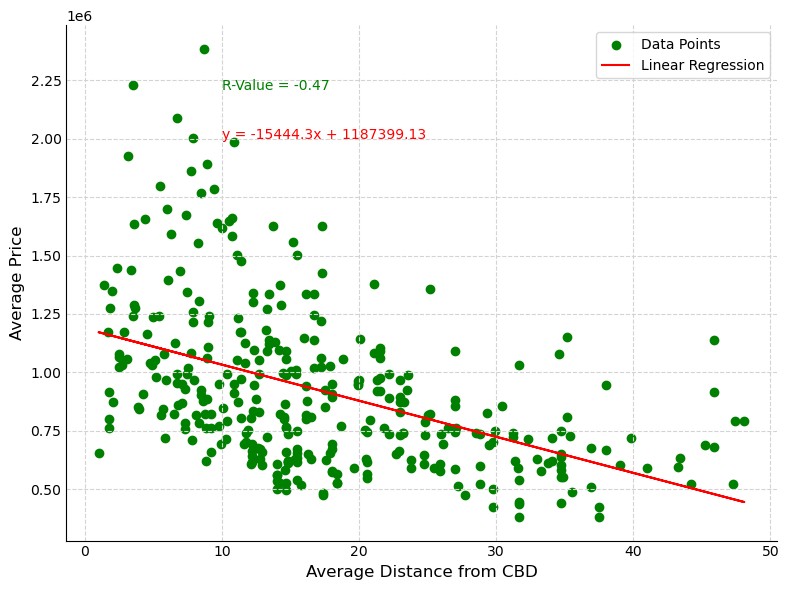

In [19]:
# Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(average_price_distance_df['Average Distance'], average_price_distance_df['Average Price'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the scatter plot
ax.scatter(average_price_distance_df['Average Distance'], average_price_distance_df['Average Price'], color='green', label='Data Points')

# Plot the linear regression line
regress_values = slope * average_price_distance_df['Average Distance'] + intercept
ax.plot(average_price_distance_df['Average Distance'], regress_values, color='red', label='Linear Regression')

# Add labels and legend
ax.set_xlabel('Average Distance from CBD', fontsize=12)
ax.set_ylabel('Average Price', fontsize=12)
ax.legend(fontsize=10)

# Add equation and R-value to the plot
equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
r_value_text = f"R-Value = {round(r_value, 2)}"
ax.text(10, 2000000, equation_text, color='red', fontsize=10)
ax.text(10, 2211100, r_value_text, color='green', fontsize=10)

# Customize the plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.grid(color='lightgray', linestyle='--')

# Adjust the plot layout
fig.tight_layout()

# Save the plot as an image
output_filepath = '/Users/Masih/Desktop/plot.png'
plt.savefig(output_filepath)

# Display the plot
plt.show()


As a data analyst, from this Python code and the resulting graph, we can infer the following:

1. The code is performing a linear regression analysis between 'Average Distance from CBD' and 'Average Price'. This is to understand the relationship between these two variables.

2. The slope and intercept obtained from the linear regression can give us an idea about the nature of the relationship. The slope is negative, it means that as the average distance from CBD increases, the average price decreases.

3. The R-value (or correlation coefficient) indicates the strength and direction of the relationship between the two variables. A value close to 1 indicates a strong positive relationship, a value close to -1 indicates a strong negative relationship, and a value close to 0 indicates no relationship. In this case  the r value is -0.47, which means there is a negative correlation between the average distance from CBD and the average price of housing. When the average distance from CBD increases, the average price of housing decreases and vis-Versa. 

4. The scatter plot visualizes the data points and the linear regression line, which can help us visually understand the relationship between the two variables.
